In [1]:

import time
import os
import shutil
import pandas as pd
from datetime import datetime
from dateutil import tz
import warnings
import itertools

import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [2]:
# Remove the NaN rows and columns

def removeNaN(curr_feat_1, curr_feat_2):
    curr_feat_1_nan = np.array([])  # numpy.float64
    curr_feat_2_nan = np.array([])  # numpy.float64
    posi = 0
    # *** Check for and remove the Nan rows in from ONLY [curr_feat_2] feature rows
    for posi in range(len(curr_feat_2)):
        if not (math.isnan(curr_feat_2[posi])):# and not(math.isnan(curr_feat_1[posi]))):
            curr_feat_1_nan = np.append(curr_feat_1_nan, curr_feat_1[posi])
            curr_feat_2_nan = np.append(curr_feat_2_nan, curr_feat_2[posi])
            if (posi < 10):
                print(curr_feat_2_nan[posi])
        if (math.isnan(curr_feat_1[posi])):
            # curr_feat_1_nan = np.append(curr_feat_1_nan, curr_feat_1[posi])
            # curr_feat_2_nan = np.append(curr_feat_2_nan, curr_feat_2[posi])
            if (posi < 10):
                print(curr_feat_2_nan[posi])
    return curr_feat_1_nan, curr_feat_2_nan

#### Import .csv dataset into pandas
print('Importing Data Now')

#filename = '/Users/Mandala/PycharmProjects/ML_Project/windowing_results.csv'
filename = 'heart_rate_new.csv'

# Read data from csv file 
df_feat = pd.read_csv(filename)
df_keys = df_feat.keys()



Importing Data Now


In [3]:
df_feat

,Unnamed: 0,GSR #,start_time,end_time,hr_mean,hr_std,hr_50%,Activity
0,Heart_rate,1,2019-11-21 09:35:27,2019-11-21 09:35:31,-1.0,0.0,-1.0,"(0,0)"
1,Heart_rate,1,2019-11-21 09:35:29,2019-11-21 09:35:33,-1.0,0.0,-1.0,"(0,0)"
2,Heart_rate,1,2019-11-21 09:35:31,2019-11-21 09:35:35,-1.0,0.0,-1.0,"(0,0)"
3,Heart_rate,1,2019-11-21 09:35:33,2019-11-21 09:35:37,-1.0,0.0,-1.0,"(0,0)"
4,Heart_rate,1,2019-11-21 09:35:35,2019-11-21 09:35:39,-1.0,0.0,-1.0,"(0,0)"
...,...,...,...,...,...,...,...,...
5100,Heart_rate,6,2019-11-21 11:00:28,2019-11-21 11:00:32,-1.0,0.0,-1.0,"(2,3)"
5101,Heart_rate,6,2019-11-21 11:00:30,2019-11-21 11:00:34,-1.0,0.0,-1.0,"(2,3)"
5102,Heart_rate,6,2019-11-21 11:00:32,2019-11-21 11:00:36,-1.0,0.0,-1.0,"(2,3)"
5103,Heart_rate,6,2019-11-21 11:00:34,2019-11-21 11:00:38,-1.0,0.0,-1.0,"(2,3)"


In [4]:
print(df_keys)
len(df_keys)

Index(['Unnamed: 0', 'GSR #', 'start_time', 'end_time', 'hr_mean', 'hr_std',
       'hr_50%', 'Activity'],
      dtype='object')


8

In [5]:
# Data Preprocessing
df = df_feat.copy()
df = df.dropna()

Xs = df[df_keys[4:7]]
y = df['Activity']

print(Xs)
print(y)

      hr_mean  hr_std  hr_50%
0        -1.0     0.0    -1.0
1        -1.0     0.0    -1.0
2        -1.0     0.0    -1.0
3        -1.0     0.0    -1.0
4        -1.0     0.0    -1.0
...       ...     ...     ...
5100     -1.0     0.0    -1.0
5101     -1.0     0.0    -1.0
5102     -1.0     0.0    -1.0
5103     -1.0     0.0    -1.0
5104     -1.0     0.0    -1.0

[5105 rows x 3 columns]
0       (0,0)
1       (0,0)
2       (0,0)
3       (0,0)
4       (0,0)
        ...  
5100    (2,3)
5101    (2,3)
5102    (2,3)
5103    (2,3)
5104    (2,3)
Name: Activity, Length: 5105, dtype: object


In [6]:
# This is the data split

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=10)

# Training the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [7]:
y_pred = classifier.predict(X_test)
print(y_pred)

['(0,3)' '(0,2)' '(1,3)' ... '(2,3)' '(2,3)' '(2,3)']


In [8]:
len(y_pred)

1021

In [9]:
len(y_test)

1021

In [10]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[ 0  0  2  0  0  2  0  0  0  0  0 23]
 [ 0 33  6  6  1  5  7  2  0  2  3 40]
 [ 1 26 16  8  3 10  9  3  0  2  7 24]
 [ 0 18  8  9  1  1  6  2  0  2  9 33]
 [ 0  0  2  0  1  1  1  2  0  0  4  5]
 [ 0  5  5  9  2 13  3  6  0  1  9 37]
 [ 2  5 19  3  1 14 24 10  0  4 11 59]
 [ 0  8  1  3  2  2  9 14  0  1  7 56]
 [ 0  0  5  2  0  1  1  1  0  1  1  7]
 [ 0  6  9  2  3  7  8  2  0  4  8 31]
 [ 0 12 13  5  2  6 18  9  0  7 15 50]
 [ 0  0  7  5  0  7  8  6  1  1  4 55]]
              precision    recall  f1-score   support

       (0,0)       0.00      0.00      0.00        27
       (0,1)       0.29      0.31      0.30       105
       (0,2)       0.17      0.15      0.16       109
       (0,3)       0.17      0.10      0.13        89
       (1,0)       0.06      0.06      0.06        16
       (1,1)       0.19      0.14      0.16        90
       (1,2)       0.26      0.16      0.20       152
       (1,3)       0.25      0.14      0.17       103
       (2,0)       0.00      0.00      0.00 

In [11]:
accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Accuracy')

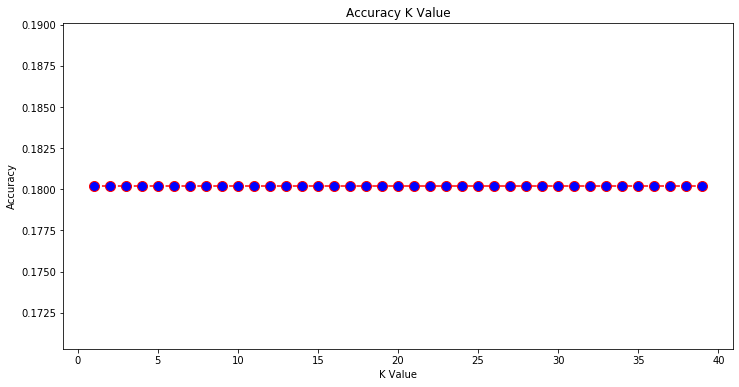

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [13]:
df_video = df.loc[(df.Activity == "(0,0)") | (df.Activity == "(0,1)") | (df.Activity == "(0,2)") | (df.Activity == "(0,3)")]

In [14]:
df_noeval = df.loc[(df.Activity == "(1,0)") | (df.Activity == "(1,1)") | (df.Activity == "(1,2)") | (df.Activity == "(1,3)")]

In [15]:
df_eval = df.loc[(df.Activity == "(2,0)") | (df.Activity == "(2,1)") | (df.Activity == "(2,2)") | (df.Activity == "(2,3)")]

In [16]:
def kNN(x):
    y = x.copy()
    df = y.dropna()

    Xs = df[df_keys[4:7]]
    y = df['Activity']
    
    X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=10)

    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=7)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test,y_pred))

In [17]:
kNN(df_video)

[[ 1  4 17  2]
 [ 0 19 79  5]
 [ 2 17 81  9]
 [ 1 22 66 13]]
              precision    recall  f1-score   support

       (0,0)       0.25      0.04      0.07        24
       (0,1)       0.31      0.18      0.23       103
       (0,2)       0.33      0.74      0.46       109
       (0,3)       0.45      0.13      0.20       102

    accuracy                           0.34       338
   macro avg       0.33      0.27      0.24       338
weighted avg       0.35      0.34      0.28       338

0.33727810650887574


In [18]:
kNN(df_noeval)

[[  2   4  10   4]
 [  2  28  64   6]
 [  2  20 114  10]
 [  3  11  72  13]]
              precision    recall  f1-score   support

       (1,0)       0.22      0.10      0.14        20
       (1,1)       0.44      0.28      0.34       100
       (1,2)       0.44      0.78      0.56       146
       (1,3)       0.39      0.13      0.20        99

    accuracy                           0.43       365
   macro avg       0.37      0.32      0.31       365
weighted avg       0.42      0.43      0.38       365

0.4301369863013699


In [19]:
kNN(df_eval)

[[  0   5  10   4]
 [  0  11  52   5]
 [  0  23 110   3]
 [  1  14  73   8]]
              precision    recall  f1-score   support

       (2,0)       0.00      0.00      0.00        19
       (2,1)       0.21      0.16      0.18        68
       (2,2)       0.45      0.81      0.58       136
       (2,3)       0.40      0.08      0.14        96

    accuracy                           0.40       319
   macro avg       0.26      0.26      0.22       319
weighted avg       0.36      0.40      0.33       319

0.4043887147335423
